In [24]:
import numpy as np
from numpy import random as rand
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [272]:

def Num2Res(mode=None):
    
    Num_Values=np.hstack([5*np.ones(4,dtype=int),
                          4*np.ones(4,dtype=int),
                          3*np.ones(4,dtype=int),
                          2*np.ones(4,dtype=int),
                          np.ones(2,dtype=int)])    
    Num_Tokens=np.array([6,6,8,8,5,5,9,9,4,4,10,10,3,3,11,11,2,12],dtype=int)
    
    if mode==1:
        distrb=np.array([11,11,12,12,12]) 
    elif mode==2:  
        distrb=np.array([11,11,11,11,14]) 
    else:
        distrb=np.array([10,12,12,12,12]) 
    rand.shuffle(distrb)
    
    Nam=['Brick','Ore','Lumber','Grain','Sheep']
    idx=np.arange(18)
    
    d=None
    while d != distrb[3]:
        c=None
        while c != distrb[2]:
            b=None
            while b != distrb[1]:
                a=None
                while a != distrb[0]:
                    rand.shuffle(idx)
                    Num_Values=Num_Values[idx]
                    Num_Tokens=Num_Tokens[idx]
                    a=int(sum(Num_Values[:3]))
                b=int(sum(Num_Values[3:6]))
            c=int(sum(Num_Values[6:10]))
        d=int(sum(Num_Values[10:14]))
    
    Res=list(np.zeros(19))
    for i in np.arange(18):
        if i <=2:
            Res[i]=np.array([Nam[0],Num_Tokens[i]])
        elif 2 < i and i <= 5:
            Res[i]=np.array([Nam[1],Num_Tokens[i]])
        elif 5 < i and i <= 9:
            Res[i]=np.array([Nam[2],Num_Tokens[i]])
        elif 9 < i and i <= 13:
            Res[i]=np.array([Nam[3],Num_Tokens[i]])
        else:
            Res[i]=np.array([Nam[4],Num_Tokens[i]])
    Res[-1]=np.array(['Desert',0])
    Num_Values=np.append(Num_Values,0)
    return(Res,Num_Values)

def checkall(check=None,require=None):
    urn=np.arange(len(check))
    for i in urn:
        if check[i] in require:
            urn[i]=1
        else:
            urn[i]=0
    return(all(urn))

def disk_sum(number=None,radius=None): #radius >= 1    
    if (len(number)-1) % 6:
        return("Not a complete ring")
    else:        
        sumset=np.ones(6*(radius**2), dtype=int)
        for i in np.arange(6):
            re=np.arange(1,7)                
            sumset[i]=int(number[0]+number[i+1]+number[re[np.mod(i+1,6)]])
                
        for x in np.arange(2,radius+1):
            n=6*(x)**2-6*(x-1)**2
            for k in np.arange(6):
                
                idd=k*(x+1)+6*(x-1)**2
                even=(x**3)-((x-1)**3) + k*x
                odd= ((x-1)**3)-((x-2)**3) + k*(x-1)
                
                hexseq=np.ones(int(n/6)+2,dtype=int)
                for m in np.arange(int(n/6)+2):
                    if not m % 2:
                        hexseq[m]=int(even+m/2)
                    else:
                        hexseq[m]=int(odd+m//2)
                if k==5:
                    hexseq[-1]=hexseq[-2]
                    hexseq[-2]=int(((x-1)**3)-((x-2)**3))
                for l in np.arange(len(hexseq[:-2])):
                    sumset[int(idd+l)]=int(sum(number[hexseq[l:l+3]]))
    return(sumset)
                
                
def spiral(center=None,radius=None):
    cubedirect=np.vstack([np.array([2,0]), #left first
                          np.array([1,2]),
                          np.array([-1,2]),
                          np.array([-2,0]),
                          np.array([-1,-2]),
                          np.array([1,-2])])       
    
    result=list(np.ones(((radius+1)**3)-((radius)**3)))
    result[0]=np.array(center)
    
    for k in np.arange(1,radius+1):
        cube=np.array(center)+cubedirect[-2]*k
        result[int(((k)**3)-((k-1)**3))]=cube
        for i in np.arange(6):
            if i == 5:
                for j in np.arange(k-1):
                    cube = cube + cubedirect[i]
                    result[int(((k)**3)-((k-1)**3)+i*k+(j+1))]=cube
            else:
                for j in np.arange(k):
                    cube = cube + cubedirect[i]
                    result[int(((k)**3)-((k-1)**3)+i*k+(j+1))]=cube
    return np.array(result)

In [530]:
def first_board(mode=None,adj6=None,val_stack=None,stack_num=None):

    res_token=Num2Res(mode)
    token_value=res_token[1]

    node_sum=disk_sum(token_value,2)
    idx=np.arange(len(token_value))
    l=0
    while not checkall(disk_sum(token_value[idx],2),[8,9,10,11]):
        rand.shuffle(idx)
        iteration=0
        if adj6:    #first ring
            while not checkall(disk_sum(token_value[idx],1), [8,9,10,11]) or (list(token_value[idx][:7]).count(val_stack)  !=stack_num ):    
                rand.shuffle(idx)
        else:
            while not checkall(disk_sum(token_value[idx],1), [9,10,11]):
                rand.shuffle(idx)
        lhalf=idx[7:]
        while not checkall(disk_sum(token_value[idx],2),[8,9,10,11]):             #second ring
            rand.shuffle(lhalf)
            idx[7:]=lhalf
            iteration=iteration+1
            if iteration > 50000:
                l=l+1
                break


    colors = [(155/256,82/256,29/256),#brick
          (100/256,97/256,104/256),#ore
          (41/256,87/256,41/256), #lumber
          (253/256,245/256,138/256),#grain
          (142/256, 191/256, 73/256), #sheep
          (216/256, 179/256, 109/256), #desert
          (255/256,215/256,0/256), #gold
          (0,163/256,226/256) #ocean
         ]

    cm = LinearSegmentedColormap.from_list('my_list', colors, N=8)
    Names=['Brick','Ore','Lumber','Grain','Sheep','Desert','Gold','Sea']
    z=list(8*np.ones(37))
    for i in np.arange(19):
        z[i]=Names.index(np.array(res_token[0])[idx][i][0])

    ######### Text/Graph

    x = spiral([0,0],3)[:,0]
    y = spiral([0,0],3)[:,1]


    #fig, ax = plt.subplots(ncols=1, sharey=True,  figsize=(13, 10))
    plt.figure(figsize=(15,12))
    plt.hexbin(x,y,z, gridsize=10,extent=[-9,11,-10,10], bins=None,cmap=cm,edgecolors=None)


    plt.title("Catan Board")
    plt.colorbar()
    #cb.set_label('Color')

    plt.xticks(np.arange(-9,11,1))
    plt.yticks(np.arange(-10,10,1))
    for i in np.arange(19):
        if np.array(res_token[0])[idx][:,1][i] == "6" or np.array(res_token[0])[idx][:,1][i] == "8":
            plt.text(x[i],y[i],np.array(res_token[0])[idx][:,1][i],fontsize=20,color="r")
        else:
            plt.text(x[i],y[i],np.array(res_token[0])[idx][:,1][i],fontsize=20)

    plt.grid(0)
    plt.show()
    return(iteration,l)

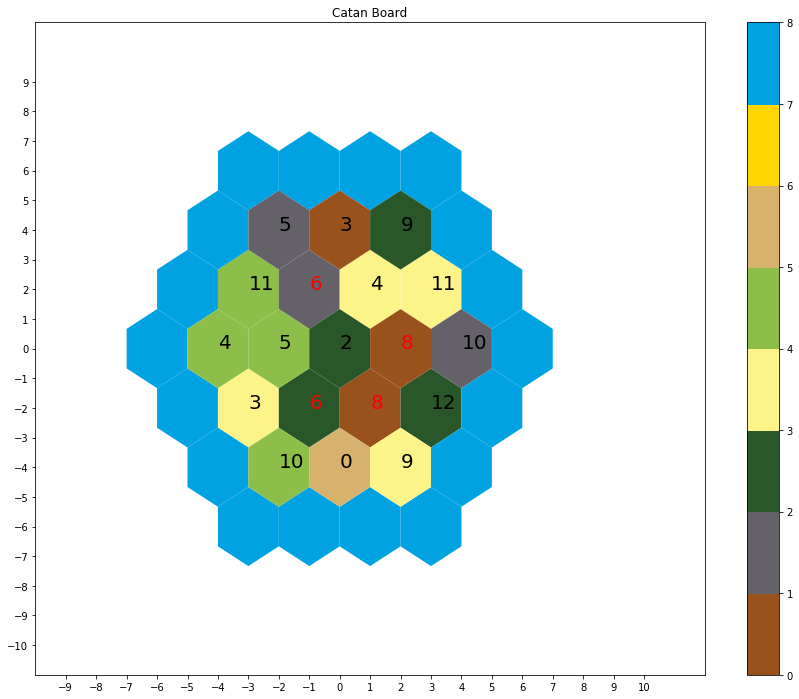

(5724, 1)

In [534]:
first_board(mode=1,adj6=1,val_stack=5,stack_num=4)